In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis

In [10]:
def extract_features(window):
    features = {}
    features['max'] = np.max(window)
    #features['min'] = np.min(window)  this isnt useful cause the min is set to zero manually 
    features['mean'] = np.mean(window)
    features['std'] = np.std(window)
    features['sum_abs'] = np.sum(np.abs(window))
    features['peak_to_peak'] = np.ptp(window)

    # Number of peaks
    peaks, _ = find_peaks(window, height = 1.01, distance = 2)  # You can set a height threshold
    features['num_peaks'] = len(peaks)

    # Max gradient
    grad = np.gradient(window)
    features['max_grad'] = np.max(np.abs(grad))

    # Skewness and Kurtosis
    features['skewness'] = skew(window)
    features['kurtosis'] = kurtosis(window)

    # Energy (sum of squares)
    features['energy'] = np.sum(window ** 2)

    # First few FFT components
    fft_vals = np.abs(np.fft.fft(window))[:5]
    for i, val in enumerate(fft_vals):
        features[f'fft_{i}'] = val

    return features


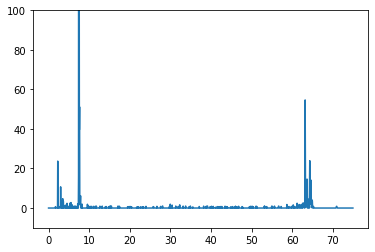

In [3]:
filename = "Augmented.txt"  
data = np.loadtxt(filename, delimiter=",")


time = data[:, 0]     
piezo = data[:, 1]


plt.plot(time, piezo)
plt.ylim(-10,100)
plt.show()


In [4]:
threshold = 1.01 
peaks, _ = find_peaks(piezo, height=threshold, distance=2)  

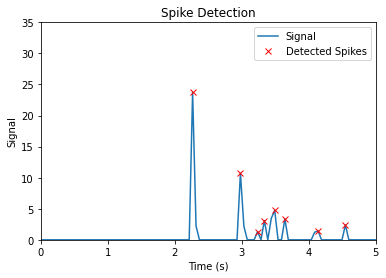

36


In [6]:
piezo[np.abs(piezo) < threshold] = 0 
plt.plot(time, piezo, label='Signal')
plt.plot(time[peaks], piezo[peaks], "rx", label='Detected Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Spike Detection')
plt.ylim(0, 35)
plt.xlim(0, 5)
plt.show()


print(len(peaks))

In [7]:
print("Spikes found at times:", time[peaks])
print("These are the spikes:", piezo[peaks])

Spikes found at times: [ 2.265  2.979  3.235  3.337  3.491  3.643  4.139  4.547  5.313  5.517
  5.824  7.183  7.438  7.641  7.885  7.987  8.089  8.242  9.577 29.972
 30.43  32.296 58.695 60.257 61.21  61.72  61.924 62.435 62.697 63.192
 63.451 63.658 63.966 64.325 64.633 64.913]
These are the spikes: [ 23.73648067  10.71456652   1.31259724   3.09147248   4.72937595
   3.36928285   1.44606483   2.38389327   2.52541034   2.76374296
   1.60630373   2.17675504 623.87026271  51.18022494   6.19161528
   1.60256911   1.17781777   1.99354585   1.91260167   1.94229239
   1.48887424   1.60792624   1.78191459   1.59647897   2.42240184
   1.79314187   1.68224649   1.99466946   2.62196363  54.675513
  10.74061793  14.64679488   4.49923594  23.96210668  14.11309908
   4.06072883]


In [8]:
window_size = 30


spike_windows = []

for peak in peaks:
    start = max(peak - window_size//2, 0)
    end = min(peak + window_size//2, len(piezo))
    window = piezo[start:end]
    spike_windows.append(window)
    

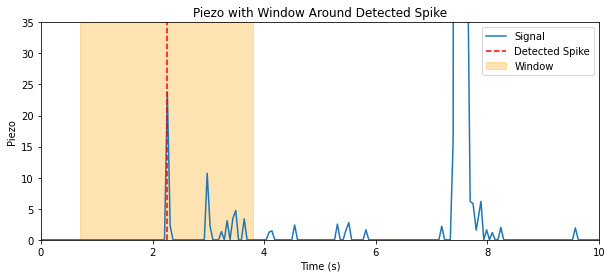

In [9]:
spike_idx = peaks[0] 
window_size = 30

start_idx = max(spike_idx - window_size, 0)
end_idx = min(spike_idx + window_size, len(piezo))


plt.figure(figsize=(10, 4))
plt.plot(time, piezo, label="Signal")
plt.axvline(time[spike_idx], color='r', linestyle='--', label='Detected Spike')

plt.axvspan(time[start_idx], time[end_idx], color='orange', alpha=0.3, label='Window')
plt.legend()
plt.ylim(0, 35)
plt.xlim(0, 10)


plt.title('Piezo with Window Around Detected Spike')
plt.xlabel('Time (s)')
plt.ylabel('Piezo')
plt.show()

In [13]:

vectors = []

stats = extract_features(spike_windows[0])
vectors.append(stats)


In [14]:
print(vectors)

[{'max': 23.736480665051886, 'mean': 1.2227725315911495, 'std': 4.612843190419735, 'sum_abs': 36.68317594773448, 'peak_to_peak': 23.736480665051886, 'num_peaks': 1, 'max_grad': 11.868240332525943, 'skewness': 4.149374701183344, 'kurtosis': 16.51648157644728, 'energy': 683.2048489024667, 'fft_0': 36.68317594773448, 'fft_1': 15.672295109926036, 'fft_2': 35.73083464789107, 'fft_3': 18.510634628714154, 'fft_4': 33.00703975899014}]
